In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [29]:
df = pd.read_csv('titanic_toy.csv')

In [30]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [31]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

(array([[657.,  57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [696., 101.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 4 BarContainer objects>)

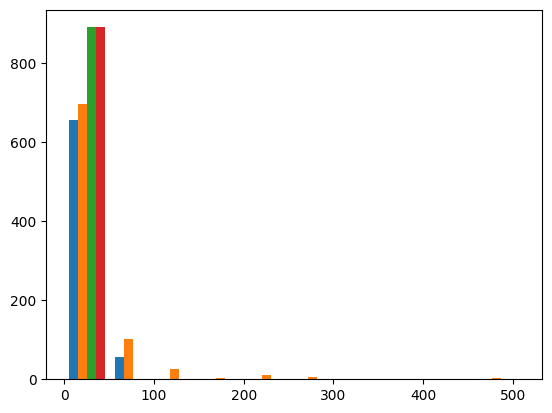

In [33]:
plt.hist(df,bins=10)

In [34]:
#mean_age = X_train['Age'].mean()
#median_age = X_train['Age'].median()

#mean_fare = X_train['Fare'].mean()
#median_fare = X_train['Fare'].median()

In [35]:
X_train['99_age'] = X_train['Age'].fillna(99)
X_train['-1_age'] = X_train['Age'].fillna(-1)

X_train['99_fare'] = X_train['Fare'].fillna(99)
X_train['-1_fare'] = X_train['Fare'].fillna(-1)



#X_test['mean_age'] = X_test['Age'].fillna(mean_age)
#X_test['median_age'] = X_test['Age'].fillna(median_age)

#X_test['mean_fare'] = X_test['Fare'].fillna(mean_fare)
#X_test['median_fare'] = X_test['Fare'].fillna(median_fare)

In [36]:
X_train

,Age,Fare,Family,99_age,-1_age,99_fare,-1_fare
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [37]:
X_train.isnull().mean()*100

Age        20.786517
Fare        5.056180
Family      0.000000
99_age      0.000000
-1_age      0.000000
99_fare     0.000000
-1_fare     0.000000
dtype: float64

In [38]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train['99_age'].var())
print('Age Variance after median imputation: ', X_train['-1_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train['99_fare'].var())
print('Fare Variance after median imputation: ', X_train['-1_fare'].var())

Original Age variable variance:  204.3495133904614
Age Variance after mean imputation:  951.7275570187172
Age Variance after median imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after mean imputation:  2536.0773428319685
Fare Variance after median imputation:  2378.5676784883503


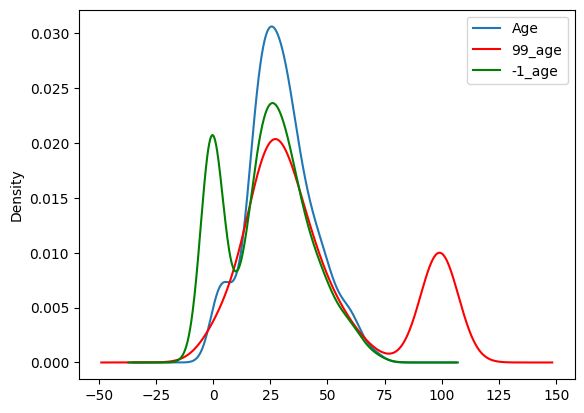

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['99_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['-1_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

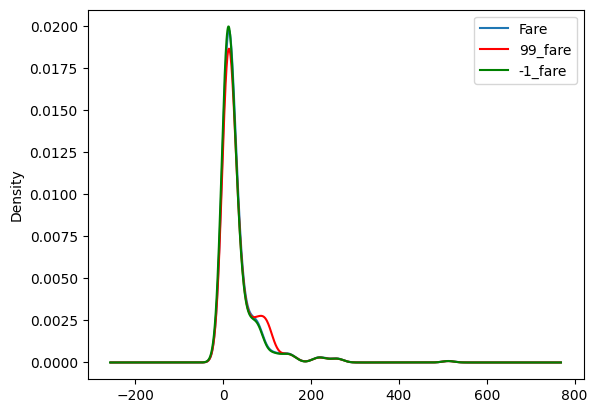

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['99_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['-1_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [41]:
X_train.corr()

,Age,Fare,Family,99_age,-1_age,99_fare,-1_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
99_age,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
-1_age,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
99_fare,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
-1_fare,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


<Axes: >

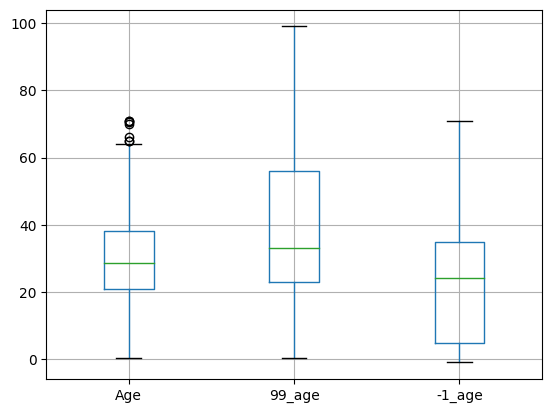

In [42]:
X_train[['Age','99_age','-1_age']].boxplot()

<Axes: >

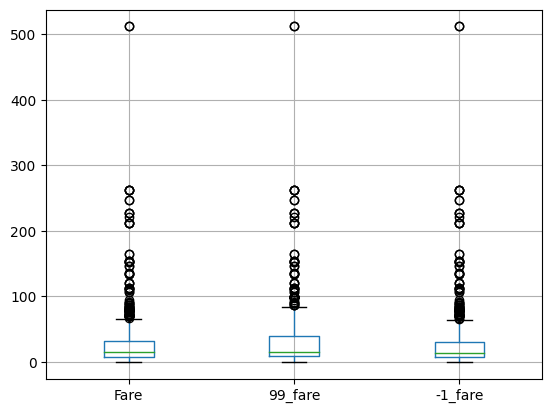

In [43]:
X_train[['Fare','99_fare','-1_fare']].boxplot()

# Using Sklearn

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=-1)

In [46]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [47]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [48]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [49]:
trf.named_transformers_['imputer2'].statistics_

array([-1.])

In [50]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [51]:
X_test

array([[ 42.    ,  26.2875,   0.    ],
       [ 21.    ,   8.05  ,   0.    ],
       [ 24.    ,  65.    ,   3.    ],
       [ 28.    ,  56.4958,   0.    ],
       [ 17.    ,   7.925 ,   6.    ],
       [ 30.    ,   7.8958,   0.    ],
       [ 80.    ,  30.    ,   0.    ],
       [ 25.    ,   7.25  ,   0.    ],
       [ 50.    , 133.65  ,   2.    ],
       [ 25.    ,  26.    ,   1.    ],
       [ 35.    ,  26.    ,   0.    ],
       [ 35.    ,  90.    ,   1.    ],
       [ 55.    ,  16.    ,   0.    ],
       [ 99.    ,  56.4958,   0.    ],
       [ 99.    ,  56.4958,   0.    ],
       [ 19.    ,   7.8542,   1.    ],
       [ 99.    ,  15.2458,   2.    ],
       [ 49.    ,   0.    ,   0.    ],
       [ 18.    ,  -1.    ,   1.    ],
       [ 65.    ,   7.75  ,   0.    ],
       [ 18.    , 108.9   ,   1.    ],
       [ 99.    ,  22.3583,   2.    ],
       [ 16.    ,  18.    ,   2.    ],
       [ 21.    ,   9.825 ,   1.    ],
       [ 19.    ,   6.75  ,   0.    ],
       [  1.    ,  11.133